In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [144]:
class perceptron:
    def __init__(self, w):
        self.w =w
        
    def output(self, x):
        tmp = self.w.T.dot(np.append(1,x)) # 3x1 3x1
        result = 1.0 * (tmp > 0)
        return result

In [145]:
# AND
w_and = np.array([-1.2, 1, 1])
and_gate = perceptron(w_and)
x_list = [[0,0],[1,0],[0,1],[1,1]]
for x in x_list:
    print("x = {} ====> {}".format(x, and_gate.output(x)))

x = [0, 0] ====> 0.0
x = [1, 0] ====> 0.0
x = [0, 1] ====> 0.0
x = [1, 1] ====> 1.0


In [146]:
# OR
w_or = np.array([-0.5, 1, 1])
or_gate = perceptron(w_or)
x_list = [[0,0],[1,0],[0,1],[1,1]]
for x in x_list:
    print("x = {} ====> {}".format(x, or_gate.output(x)))

x = [0, 0] ====> 0.0
x = [1, 0] ====> 1.0
x = [0, 1] ====> 1.0
x = [1, 1] ====> 1.0


In [147]:
# XOR
x_list = [[0,0],[1,0],[0,1],[1,1]]
for x in x_list:
    new_x = np.c_[1 - and_gate.output(x), or_gate.output(x)]
    print("x = {} ====> {}".format(x, and_gate.output(new_x)))

x = [0, 0] ====> 0.0
x = [1, 0] ====> 1.0
x = [0, 1] ====> 1.0
x = [1, 1] ====> 0.0


In [148]:
x = np.array([1010,1000,990])
c = np.max(c)
y = np.exp(x-c)
sum = np.sum(y)


In [203]:
x = [1.0, 0.5]
class MultiPerceptron:
    def __init__(self, x, w=None, activation_param="relu"):
        self.tolerance = 1e-15
        self.activate_func = {
            "relu": self.relu,
            "sigmoid": self.sigmoid,
            "step": self.step,
            "tanh": self.tanh,
            "identity": self.identity,
            "softmax": self.softmax
        }
        
        self.in_data = x
        self.w = w
        self.out_data = self.layer_calc(self.activate_func[activation_param])
    
    # perceptron 신경 계산
    def layer_calc(self, activate):
        # 계산 후
        tmp = self.w.T.dot(np.append(self.in_data, 1))
        # 활성화해서 넘겨줌
        return activate(tmp)
    
    # 아래는 활성화 함수
    def sigmoid(self, x):
        return 1 / ( 1 + np.exp(-x))

    def step(self, x):
        return 1 if x>0 else 0

    def tanh(self, x):
        return (np.exp(x) - np.exp(-x))\
                / (np.exp(x) + np.exp(-x))

    def identity(self, x):
        return x
    
    def softmax(self, x):
        e = np.exp(x - np.max(x))
        s = np.sum(e)
        return e / s
    
    def relu(self, x):
        return list(map(lambda d: d if d>0 else 0, x))
    
# 모델
class customModel:
    def __init__(self,x=None, y=None, hidden_layer=0):
        self.layer= []
        self.weight = []
        
        self.label=y
        self.in_data = x
        self.out_data = None
        
        self.input_feature_cnt = 0
        self.output_class_cnt = 0
        self.hidden_node_cnt = hidden_layer
        
        self.check_feature_class_cnt()
        self.set_weight()
    
    # 출력용 함수
    def print_param(self):
        print(self.layer)
        print(self.weight)
        
    def return_output(self):
        return self.out_data
        
    def check_feature_class_cnt(self):
        if self.in_data not None:
            self.input_feature_cnt = len(self.in_data[0])
        
        if self.label not None:
            self.output_class_cnt = len(self.label[0])
    
    # 가중치 세팅
    def set_weight(self):
        # Layer 1
        self.weight.append(np.array([
            [0.1,0.2,0.3],
            [0.1,0.3,0.5],
            [0.2,0.4,0.6]
        ]))
        
        # Layer 2
        self.weight.append(np.array([
            [0.1,0.2],
            [0.1,0.4],
            [0.2,0.5],
            [0.3,0.6]
        ])) 
        
    # Case 1
    def set_layer_case1(self):
        input_data = self.in_data
        layer1 = MultiPerceptron(input_data, self.weight[0], activation_param="sigmoid")
        self.layer.append(layer1)
        output = MultiPerceptron(layer1.out_data, self.weight[1], activation_param="identity")
        self.layer.append(output)
        
        self.out_data = output.out_data
        
    # Case 2
    def set_layer_case2(self):
        input_data = self.in_data
        layer1 = MultiPerceptron(input_data, self.weight[0], activation_param="sigmoid")
        self.layer.append(layer1)
        output = MultiPerceptron(layer1.out_data, self.weight[1], activation_param="softmax")
        self.layer.append(output)
        
        self.out_data = output.out_data
        
    # Case 3  
    def set_layer_case3(self):
        input_data = self.in_data
        layer1 = MultiPerceptron(input_data, self.weight[0], activation_param="relu")
        self.layer.append(layer1)
        output = MultiPerceptron(layer1.out_data, self.weight[1], activation_param="identity")
        self.layer.append(output)
        
        self.out_data = output.out_data
        
    # Case 4
    def set_layer_case4(self):
        input_data = self.in_data
        layer1 = MultiPerceptron(input_data, self.weight[0], activation_param="relu")
        self.layer.append(layer1)
        output = MultiPerceptron(layer1.out_data, self.weight[1], activation_param="softmax")
        self.layer.append(output)
        
        self.out_data = output.out_data

case1 = customModel(x)
case1.set_layer_case1()
print("x:{}, y:{}".format(x, case1.return_output()))

case2 = customModel(x)
case2.set_layer_case2()
print("x:{}, y:{}".format(x, case2.return_output()))

case3 = customModel(x)
case3.set_layer_case3()
print("x:{}, y:{}".format(x, case3.return_output()))

case4 = customModel(x)
case4.set_layer_case4()
print("x:{}, y:{}".format(x, case4.return_output()))

x:[1.0, 0.5], y:[0.57848181 1.36875045]
x:[1.0, 0.5], y:[0.31211099 0.68788901]
x:[1.0, 0.5], y:[0.64  1.545]
x:[1.0, 0.5], y:[0.28802408 0.71197592]


In [258]:
# 데이터 셋 읽어들입니다.
dataFrame = pd.read_csv("NN_data.csv")
data = dataFrame.iloc[:,1:]

noise =np.random.normal(0,2, size=(900,3))

In [531]:
data_x = data.iloc[:,:3]
data_y = data.iloc[:,3]
data_x_noise = data_x + noise
data_x_noise
data_x["x0"]

0      1.028331
1      3.365343
2      3.635289
3      4.248292
4      3.495625
         ...   
895    7.430523
896    5.959810
897    5.707876
898    6.121856
899    2.738941
Name: x0, Length: 900, dtype: float64

In [260]:
class1 = data_x_noise[:300].to_numpy()
class2 = data_x_noise[300:600].to_numpy()
class3 = data_x_noise[600:].to_numpy()

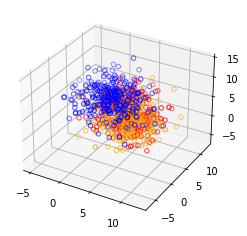

In [261]:
FEATURE_LABEL = {
    "x0": 0,
    "x1": 1,
    "x2": 2
}

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(class1.T[FEATURE_LABEL["x0"]], class1.T[FEATURE_LABEL["x1"]], class1.T[FEATURE_LABEL["x2"]],  facecolors='none', edgecolors='blue')
ax.scatter(class2.T[FEATURE_LABEL["x0"]], class2.T[FEATURE_LABEL["x1"]], class2.T[FEATURE_LABEL["x2"]],  facecolors='none', edgecolors='red')
ax.scatter(class3.T[FEATURE_LABEL["x0"]], class3.T[FEATURE_LABEL["x1"]], class3.T[FEATURE_LABEL["x2"]],  facecolors='none', edgecolors='orange')
plt.show()

In [288]:
# 데이터의 클래스 갯수 구하는 함수
data_encode_label = []
def find_class_num(y):
    class_list = []
    for d in y:
        # 클래스 리스트에 기존에 넣은 클래스가 없으면 넣는다.
        if d not in class_list:
            class_list.append(d)
    return class_list

def one_hot_encode(y):
    class_list = find_class_num(y)
    cnt_class = len(class_list)
    print("Class Summary: Total={}".format(cnt_class))
    
    # 클래스에 따라 리스트를 만들어 준다.
    # 라벨이 숫자가 아닐수도 있기에 dictionary로 받습니다.

    one_hot_label = {}
    for i, d in enumerate(class_list):
        print("\tClass{}번: {}".format(i+1, i))
        one_hot_label[d] = [1 if i==j else 0 for j in range(cnt_class)]
    print(one_hot_label)
    
    for i in range(len(data_y)):
        data_encode_label.append(one_hot_label[y[i]])
    return cnt_class

cnt_class = one_hot_encode(data_y)

Class Summary: Total=3
	Class1번: 0
	Class2번: 1
	Class3번: 2
{1: [1, 0, 0], 2: [0, 1, 0], 3: [0, 0, 1]}


In [284]:
class1_y = np.array(data_encode_label[:300])
class2_y = np.array(data_encode_label[300:600])
class3_y = np.array(data_encode_label[600:])

In [297]:
with open('NN_data_one_encode.csv', 'w') as f:
    write = csv.writer(f)
    feature_name = ["x0", "x1", "x2"]
    # 데이터 특성과 라벨 인코드 값 만드는 부분
    for i in range(cnt_class):
        feature_name.append("y{}".format(i))
    
    csv_save_data = np.c_[data_x_noise, np.array(data_encode_label)]
    
    # 데이터 특성 이름 저장
    write.writerow(feature_name)
    write.writerows(csv_save_data)

In [308]:
a = np.array([3])
a.shape[0]

1

In [310]:
np.array == type(np.array([3]))

False

In [536]:
x = [1.0, 0.5]
class MultiPerceptron:
    def __init__(self, last_layer=None, node=0, activation_param="relu", name=None):
        self.tolerance = 1e-15
        self.activate_func = {
            "relu": self.relu,
            "sigmoid": self.sigmoid,
            "step": self.step,
            "tanh": self.tanh,
            "identity": self.identity,
            "softmax": self.softmax
        }
        
        self.last_layer = last_layer
        self.activate = self.activate_func[activation_param]
        self.in_data = None
        self.w = None
        self.out_data = None
        self.hidden_node = node
        
        # Debug용
        self.name=name
    
    def neuron(self, x):
        self.in_data = x
        self.out_data = self.layer_calc()
        return self.out_data
    
    # perceptron 신경 계산
    def layer_calc(self):
        # 계산 후
        x_b = np.c_[self.in_data, np.ones(len(self.in_data))]
        tmp = x_b.dot(self.w)
        # 활성화해서 넘겨줌
        tmp = self.activate_loop(tmp)
        return tmp
    
    def activate_loop(self, tmp):
        for i, data in enumerate(tmp):
            tmp[i] = self.activate(data)
        return tmp
                
    # 아래는 활성화 함수
    def sigmoid(self, x):
        x = 1 / ( 1 + np.exp(-x))
        return x

    def step(self, x):
        return x > 0 #1 if x>0 else 0

    def tanh(self, x):
        return (np.exp(x) - np.exp(-x))\
                / (np.exp(x) + np.exp(-x))

    def identity(self, x):
        return x
    
    # 30 x 3
    def softmax(self, x):
        e = np.exp(x - np.max(x))
        s = np.sum(e)
        return e / s
    
    def relu(self, x):
        return list(map(lambda d: d if d>0 else 0, x))
    
# 모델
class customModel:
    def __init__(self,x=[], y=[], mean=0, mu=2, hidden_layer=0):
        # 모델 전체 layer와 가중치 담아두는 리스트
        self.layer= []
        self.weight = []
        
        # 랜덤하게 가중치 생성을 위한 평균과 분산
        self.mean = mean
        self.mu = mu
        
        self.label=y
        self.in_data = x
        self.out_data = []
        self.y_pred = []
        
        self.input_feature_cnt = 0
        self.output_class_cnt = 0
        self.hidden_layer_cnt = hidden_layer
        
        self.check_feature_class_cnt()
        
    # 출력용 함수
    def print_param(self):
        print(self.layer)
        print(self.weight)
        
    def return_output(self):
        return self.out_data
    
    def softmax_predict(self):
        for d in self.out_data:
            self.y_pred.append(np.argmax(d)+1)
    
        return self.y_pred
    
    def fit(self):
        """
            입력 데이터 : row, col
        """
        self.layer[0].in_data = self.in_data
        d = self.layer[0].in_data
        for i in range(1,self.hidden_layer_cnt+2):
            d = self.layer[i].neuron(d)
        self.out_data = d
        
    
    def check_feature_class_cnt(self):
        if type(self.in_data) is np.ndarray:
            self.input_feature_cnt = len(self.in_data[0])
            
        if type(self.label) is np.ndarray:
            self.output_class_cnt = len(self.label[0])
    
    # 가중치 세팅
    def set_weight(self, auto=True):
        # 실습 2번을 위한 자동 설정 값
        if not auto:
            index = 0
            # Layer 1
            self.weight.append(np.array([
                [0.1,0.2,0.3],
                [0.1,0.3,0.5],
                [0.2,0.4,0.6]
            ]))
            self.layer[index+1].w = self.weight[index]

            index += 1
            # Layer 2
            self.weight.append(np.array([
                [0.1,0.2],
                [0.1,0.4],
                [0.2,0.5],
                [0.3,0.6]
            ]))
            self.layer[index+1].w = self.weight[index]
            return

        # AUTO
        # Input
        w =np.random.normal(self.mean,self.mu, size=(self.input_feature_cnt + 1,self.layer[1].hidden_node))
        self.weight.append(w)
        self.layer[1].w = w
        
        # Hidden - Output
        for i in range(1, self.hidden_layer_cnt+1):
            w =np.random.normal(self.mean,self.mu, size=(self.layer[i].hidden_node+1,self.layer[i+1].hidden_node))
            self.layer[i+1].w = w
            self.weight.append(w)
        
    # Case 1
    def set_layer_case1(self):
        input_data = MultiPerceptron(node=self.input_feature_cnt, name="Input_Layer")
        self.layer.append(input_data)
        
        layer1 = MultiPerceptron(input_data, node=3, activation_param="sigmoid", name="Layer1")
        self.layer.append(layer1)
        
        output = MultiPerceptron(layer1, node=self.output_class_cnt, activation_param="identity", name="Output_Layer")
        self.layer.append(output)
        
        # 모든 레이어 - 입력 - 출력
        self.hidden_layer_cnt = len(self.layer) - 2
        self.set_weight(auto=False)
        
     # Case 2
    def set_layer_case2(self):
        input_data = MultiPerceptron(node=self.input_feature_cnt, name="Input_Layer")
        self.layer.append(input_data)
        
        layer1 = MultiPerceptron(input_data, node=3, activation_param="sigmoid", name="Layer1")
        self.layer.append(layer1)
        
        output = MultiPerceptron(layer1, node=self.output_class_cnt, activation_param="softmax", name="Output_Layer")
        self.layer.append(output)
        
        # 모든 레이어 - 입력 - 출력
        self.hidden_layer_cnt = len(self.layer) - 2
        self.set_weight(auto=False)
        
    # Case 3  
    def set_layer_case3(self):
        input_data = MultiPerceptron(node=self.input_feature_cnt, name="Input_Layer")
        self.layer.append(input_data)
        
        layer1 = MultiPerceptron(input_data, node=3, activation_param="relu", name="Layer1")
        self.layer.append(layer1)
        
        output = MultiPerceptron(layer1, node=self.output_class_cnt, activation_param="identity", name="Output_Layer")
        self.layer.append(output)
        
        # 모든 레이어 - 입력 - 출력
        self.hidden_layer_cnt = len(self.layer) - 2
        self.set_weight(auto=False)
        
    # Case 4
    def set_layer_case4(self):
        input_data = MultiPerceptron(node=self.input_feature_cnt, name="Input_Layer")
        self.layer.append(input_data)
        
        layer1= MultiPerceptron(input_data, node=3, activation_param="relu", name="Layer1")
        self.layer.append(layer1)
        
        output = MultiPerceptron(layer1, node=self.output_class_cnt, activation_param="softmax", name="Output_Layer")
        self.layer.append(output)
        
        # 모든 레이어 - 입력 - 출력
        self.hidden_layer_cnt = len(self.layer) - 2
        self.set_weight(auto=False)
        
    def set_layer(self):
        input_data = MultiPerceptron(node=self.input_feature_cnt, name="Input_Layer")
        self.layer.append(input_data)
        
        layer1= MultiPerceptron(input_data, node=7, activation_param="tanh", name="Layer1")
        self.layer.append(layer1)
        
        output = MultiPerceptron(layer1, node=self.output_class_cnt, activation_param="softmax", name="Output_Layer")
        self.layer.append(output)
        
        # 모든 레이어 - 입력 - 출력
        self.hidden_layer_cnt = len(self.layer) - 2
        self.set_weight()

case1 = customModel([x])
case1.set_layer_case1() # 모델 만들기

case1.fit() # 모델 학습
print("x:{}, y:{}".format(x, case1.return_output()))

case2 = customModel([x])
case2.set_layer_case2()
case2.fit()
print("x:{}, y:{}".format(x, case2.return_output()))

case3 = customModel([x])
case3.set_layer_case3()
case3.fit()
print("x:{}, y:{}".format(x, case3.return_output()))

case4 = customModel([x])
case4.set_layer_case4()
case4.fit()
print("x:{}, y:{}".format(x, case4.return_output()))

x_noise = data_x_noise.to_numpy()
y_encode = np.array(data_encode_label)

# data_x_noise, np.array(data_encode_label
model = customModel(x_noise, y_encode)
model.set_layer()
model.fit()
np.array(model.return_output())[:10]
# model.softmax_predict()

x:[1.0, 0.5], y:[[0.57848181 1.36875045]]
x:[1.0, 0.5], y:[[0.31211099 0.68788901]]
x:[1.0, 0.5], y:[[0.64  1.545]]
x:[1.0, 0.5], y:[[0.28802408 0.71197592]]


array([[9.99970744e-01, 6.14618775e-09, 2.92497643e-05],
       [9.97637240e-01, 4.98365509e-08, 2.36271013e-03],
       [9.99970944e-01, 6.09886694e-09, 2.90502885e-05],
       [9.99970718e-01, 6.12148618e-09, 2.92762191e-05],
       [9.99949949e-01, 7.91343208e-09, 5.00435777e-05],
       [3.52544176e-01, 5.65492640e-04, 6.46890332e-01],
       [7.51818677e-01, 1.03697393e-03, 2.47144349e-01],
       [9.99956160e-01, 9.70332727e-09, 4.38298150e-05],
       [9.99966258e-01, 7.22024395e-09, 3.37344405e-05],
       [9.95026539e-01, 7.10708284e-08, 4.97339040e-03]])

In [501]:
# data_x_noise, np.array(data_encode_label
model = customModel(x_noise, y_encode)
model.set_layer()
model.fit()
np.array(model.return_output())[0]
model.softmax_predict()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
